#Latar Belakang
Sebagai anak yang suka belnja online saya akan lebih senang apa bila pengiriman belanja lebih cepat serta harga yang murah , maka dengan ini merupakan latar belaakang saya dalam menemukan insight di data ini.


#Pernyataan Masalah
Peruusahaan ingrin meningatkan daya jual dalam online shopping. Sebagai customer pasti banyak yang ingin barang dapat sampai dengan ceepat. Perusahaan juga membutuhkan feed back yang baik agar nama perusahaan dapat terus berkembang .Maka dengan ini masalah yang akan saya angkat adalah :

**Apakah ketepatan waktu pengiriman membuat rating perusahaan dapat terus berkembang?**


#DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("Online Retail Shipping.csv")
df


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


#Missing Value

In [ ]:
print("Jumalah Missing Valuenya adalah :")
df.isna().sum()

Jumalah Missing Valuenya adalah :


ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Untuk data set ini, tidak ditemukan massing value. Maka bisa langsung di analsis tanpa perlu di bersihkan

#List Item

In [ ]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(10999, 12)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,10999,"[6085, 6193]"
1,Warehouse_block,object,0,5,"[C, B]"
2,Mode_of_Shipment,object,0,3,"[Flight, Road]"
3,Customer_care_calls,int64,0,6,"[4, 6]"
4,Customer_rating,int64,0,5,"[4, 2]"
5,Cost_of_the_Product,int64,0,215,"[275, 266]"
6,Prior_purchases,int64,0,8,"[8, 6]"
7,Product_importance,object,0,3,"[medium, high]"
8,Gender,object,0,2,"[M, F]"
9,Discount_offered,int64,0,65,"[47, 5]"


Data masih sesuai jumlahnya tanpa ada yang perlu diubdah sedikit pun

#Data Analyst

#Menganalisis Daaerah:
* Daerah apa yang memesan banyak pesananan?
* Perbandingan dearah pegguna jenis pengiriman!
* Perbandingan jenis pesanan tiap daerah!

In [ ]:
#Daerah apa yang memesan banyak pesanan

def_Region= df.groupby('Warehouse_block')['Prior_purchases'].count().reset_index()
top_regions = def_Region.sort_values('Prior_purchases', ascending=False)
print(top_regions.head())

  Warehouse_block  Prior_purchases
4               F             3666
3               D             1834
0               A             1833
1               B             1833
2               C             1833


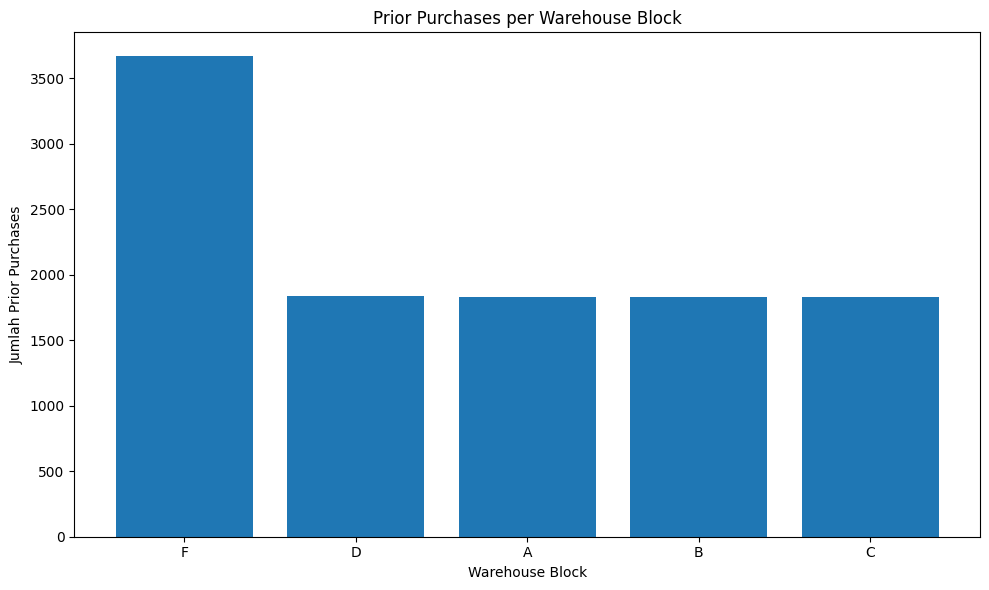

In [ ]:
# Membuat plot bar
plt.figure(figsize=(10, 6))
plt.bar(top_regions['Warehouse_block'], top_regions['Prior_purchases'])
plt.xlabel('Warehouse Block')
plt.ylabel('Jumlah Prior Purchases')
plt.title('Prior Purchases per Warehouse Block')
plt.tight_layout()

# Menampilkan plot
plt.show()

Disini Kota F yang paling banyak melakukan pemesanan dengan jumlah mencapai 3666, ini merupakan salah sattu faktor yang dapat membantu online shopping dalam mengembangkan perusahaanya.

<Figure size 1000x600 with 0 Axes>

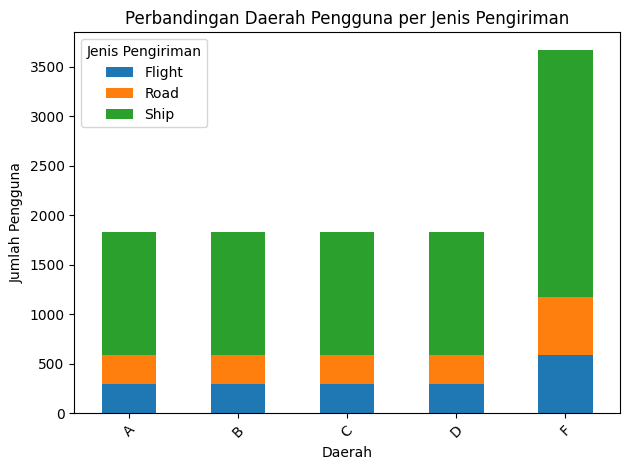

   Warehouse_block Mode_of_Shipment  Gender
0                A           Flight     297
1                A             Road     294
2                A             Ship    1242
3                B           Flight     296
4                B             Road     294
5                B             Ship    1243
6                C           Flight     295
7                C             Road     294
8                C             Ship    1244
9                D           Flight     297
10               D             Road     292
11               D             Ship    1245
12               F           Flight     592
13               F             Road     586
14               F             Ship    2488


In [ ]:
#Perbandingan dearah pegguna jenis pengiriman!

compare_User = df.groupby(['Warehouse_block', 'Mode_of_Shipment'])['Gender'].count().reset_index()
compare_User = compare_User.sort_values('Warehouse_block')
# Membuat pivot table untuk memformat data
compare_shipping_pivot = compare_User.pivot(index='Warehouse_block', columns='Mode_of_Shipment', values='Gender')
# Membuat stacked bar plot
plt.figure(figsize=(10, 6))
compare_shipping_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Daerah')
plt.ylabel('Jumlah Pengguna')
plt.title('Perbandingan Daerah Pengguna per Jenis Pengiriman')
plt.legend(title='Jenis Pengiriman')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan plot
plt.show()
print(compare_User)

Kota F Merupakan pemesan terbanyak dan Rata rata orang orang lebih menggunakan shipment kapal.Shipment kapal dipilih karena pengirimannya yang lumayan cepat.

   Warehouse_block Product_importance  Prior_purchases
0                A               high              165
1                A                low              909
2                A             medium              759
3                B               high              146
4                B                low              855
5                B             medium              832
6                C               high              168
7                C                low              874
8                C             medium              791
9                D               high              166
10               D                low              883
11               D             medium              785
12               F               high              303
13               F                low             1776
14               F             medium             1587


<Figure size 1000x600 with 0 Axes>

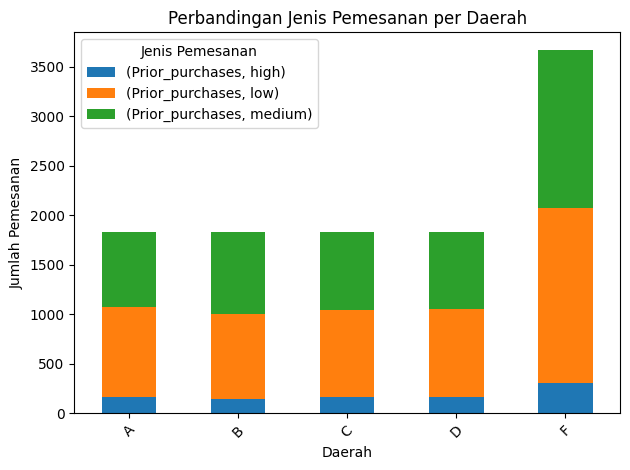

In [ ]:
# Menghitung jumlah pemesanan berdasarkan daerah dan jenis pesanan
order_type = df.groupby(['Warehouse_block', 'Product_importance'])['Prior_purchases'].count().reset_index()

# Mengurutkan data berdasarkan daerah secara alfabetis
order_type = order_type.sort_values('Warehouse_block')

# Membuat pivot table untuk memformat data
order_type_pivot = order_type.pivot(index='Warehouse_block', columns='Product_importance')

# Membuat stacked bar plot
plt.figure(figsize=(10, 6))
order_type_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Daerah')
plt.ylabel('Jumlah Pemesanan')
plt.title('Perbandingan Jenis Pemesanan per Daerah')
plt.legend(title='Jenis Pemesanan')
plt.xticks(rotation=45)
plt.tight_layout()


print(order_type)
# Menampilkan plot
plt.show()

Disini bisa kita lihat bahwa Di setiap deerah sangat bebrbeda terhadap level prioritas pembeliannya.

* kota A : Low
* kota B : Low
* kota C : Low
* kota D : Low
* kota F : Low

Tingkatan low sangat mendominasi dei seluruh kota

# Menganalisis Dari Sisi Costumer
* Mebandingkan setiap rating dari costumer dalam shipment!
* Membandingkan harga barang dan Diskon terhdapat setiap kota!
* Siapa yang lebih banyak berbelanja ?
* Siapa yang lebih bnayak menggunakan customer call?


  Mode_of_Shipment  Customer_rating
0           Flight             1777
1             Road             1760
2             Ship             7462


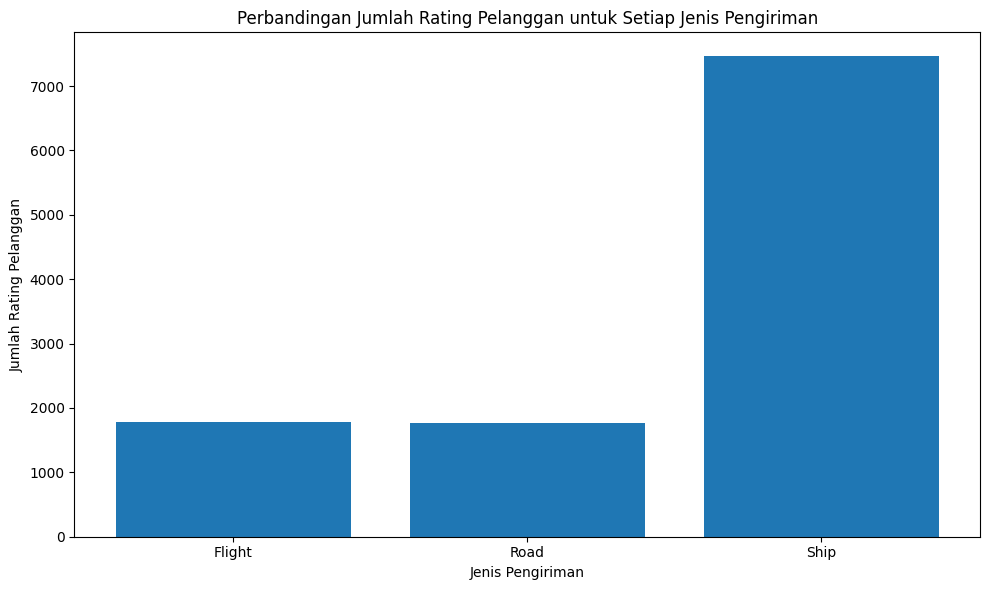

In [ ]:
# Memfilter data hanya untuk jenis pengiriman yang diinginkan (ship, flight, dan road)
filtered_data = df[df['Mode_of_Shipment'].isin(['Ship', 'Flight', 'Road'])]
# Menghitung jumlah rating pelanggan berdasarkan jenis pengiriman
rating_count_by_shipping = filtered_data.groupby('Mode_of_Shipment')['Customer_rating'].count().reset_index()

# Menampilkan jumlah rating pelanggan untuk setiap jenis pengiriman
print(rating_count_by_shipping)

# Membuat plot bar
plt.figure(figsize=(10, 6))
plt.bar(rating_count_by_shipping['Mode_of_Shipment'], rating_count_by_shipping['Customer_rating'])
plt.xlabel('Jenis Pengiriman')
plt.ylabel('Jumlah Rating Pelanggan')
plt.title('Perbandingan Jumlah Rating Pelanggan untuk Setiap Jenis Pengiriman')
plt.tight_layout()

# Menampilkan plot
plt.show()


Disini Pengguna ship mendapatkan rating tertinggi

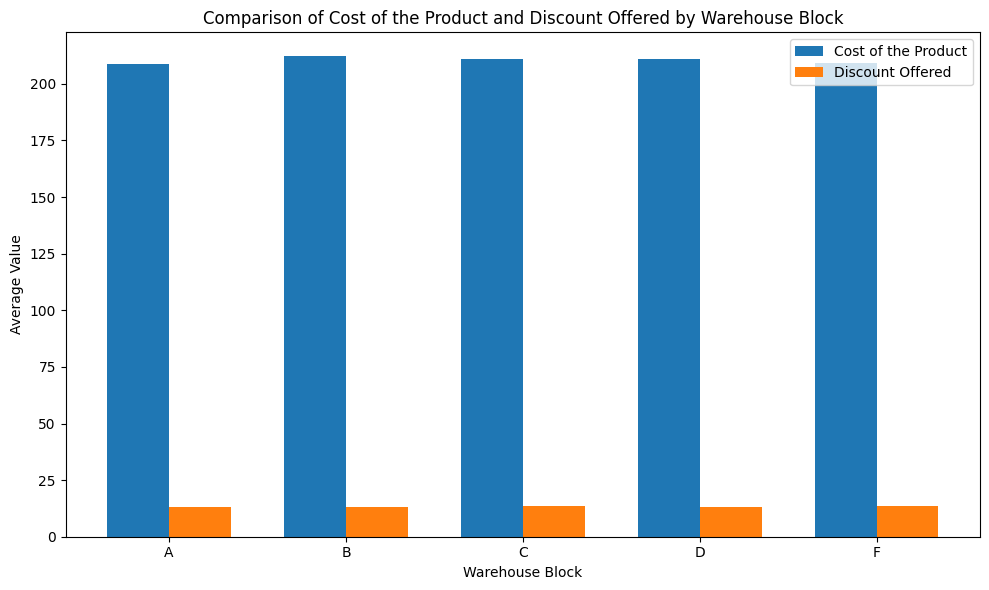

  Warehouse_block  Cost_of_the_Product  Discount_offered
0               A           208.767594         13.222586
1               B           212.159302         13.187125
2               C           211.191489         13.399891
3               D           210.907852         13.093784
4               F           209.077196         13.668031


In [ ]:
#Perbandingan setiap harga dan diskon terhadap Setiap Kota
Selected_columns = ['Warehouse_block', 'Cost_of_the_Product', 'Discount_offered']
filtered_data = df[selected_columns]

# Mengelompokkan data berdasarkan Warehouse_block dan menghitung rata-rata Cost_of_the_Product dan Discount_offered
grouped_data = filtered_data.groupby('Warehouse_block').mean().reset_index()

# Mendapatkan jumlah Warehouse_block
num_warehouses = len(grouped_data)

# Menyiapkan index dan lebar untuk setiap barplot
index = np.arange(num_warehouses)
bar_width = 0.35

# Membuat barplot untuk Cost_of_the_Product
plt.figure(figsize=(10, 6))
plt.bar(index, grouped_data['Cost_of_the_Product'], bar_width, label='Cost of the Product')

# Membuat barplot untuk Discount_offered
plt.bar(index + bar_width, grouped_data['Discount_offered'], bar_width, label='Discount Offered')

# Mengatur label sumbu x
plt.xlabel('Warehouse Block')
plt.ylabel('Average Value')
plt.title('Comparison of Cost of the Product and Discount Offered by Warehouse Block')
plt.xticks(index + bar_width/2, grouped_data['Warehouse_block'])
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()
print(grouped_data)

Untuk diskon yang ditawarkan setiap kota tidak terlalu berbeda,namun pemeblian terbanyak  dengan diskon adalah kota B

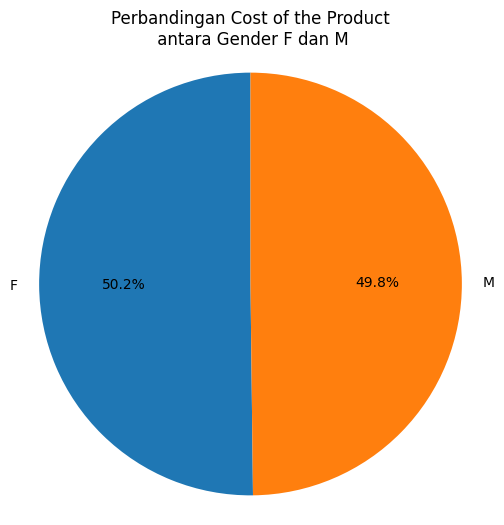

In [ ]:
filtered_data = df[df['Gender'].isin(['F', 'M'])]

# Menghitung total Cost_of_the_Product untuk setiap Gender
total_cost_by_gender = filtered_data.groupby('Gender')['Cost_of_the_Product'].sum()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(total_cost_by_gender, labels=total_cost_by_gender.index, autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Cost of the Product\n antara Gender F dan M')
plt.axis('equal')

# Menampilkan pie chart
plt.show()

Ternyata Female adalah Pembeli terbanyak dengan angka mencapai 50,2%

<Figure size 1000x600 with 0 Axes>

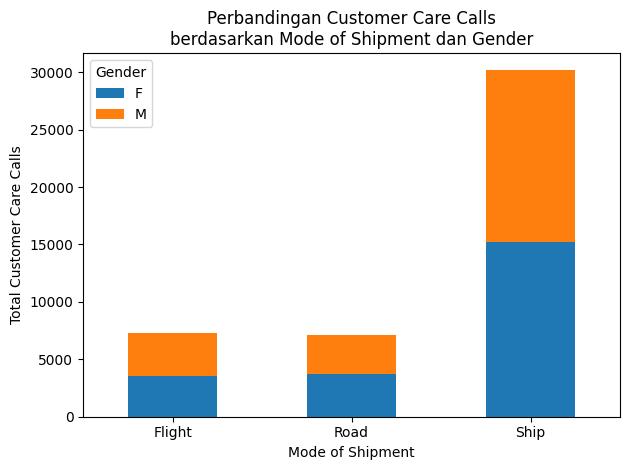

In [ ]:
#Membandingkan Customer call dengan Mode of SHipment terhadap Gender
# Memfilter data hanya untuk variabel yang diperlukan (Customer_care_calls, Mode_of_Shipment, dan Gender)
filtered_data = df[['Customer_care_calls', 'Mode_of_Shipment', 'Gender']]

# Menghitung total Customer_care_calls berdasarkan Mode_of_Shipment dan Gender
calls_by_shipment_gender = filtered_data.groupby(['Mode_of_Shipment', 'Gender'])['Customer_care_calls'].sum().unstack()

# Membuat stacked bar plot
plt.figure(figsize=(10, 6))
calls_by_shipment_gender.plot(kind='bar', stacked=True)
plt.xlabel('Mode of Shipment')
plt.ylabel('Total Customer Care Calls')
plt.title('Perbandingan Customer Care Calls\nberdasarkan Mode of Shipment dan Gender')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()

# Menampilkan plot
plt.show()

Bisa kita lihat bahwa setiap pengiriman terdapat beberaapa Customer call dengan jumlah yang berbeda. Pada perbandingan tersebut kapal lebih banyak ship memeroleh jumlah call yang lebih banyak. Dalam Gender femalelah yang lebih banyak menggunakan Customer call

# Dari sisi Pengiriman
* Pengeriman apa yang tercepat?
* Apakah Pengiriman mempengaruhi rating?

Mode_of_Shipment
Flight    0.601576
Road      0.588068
Ship      0.597561
Name: Reached.on.Time_Y.N, dtype: float64


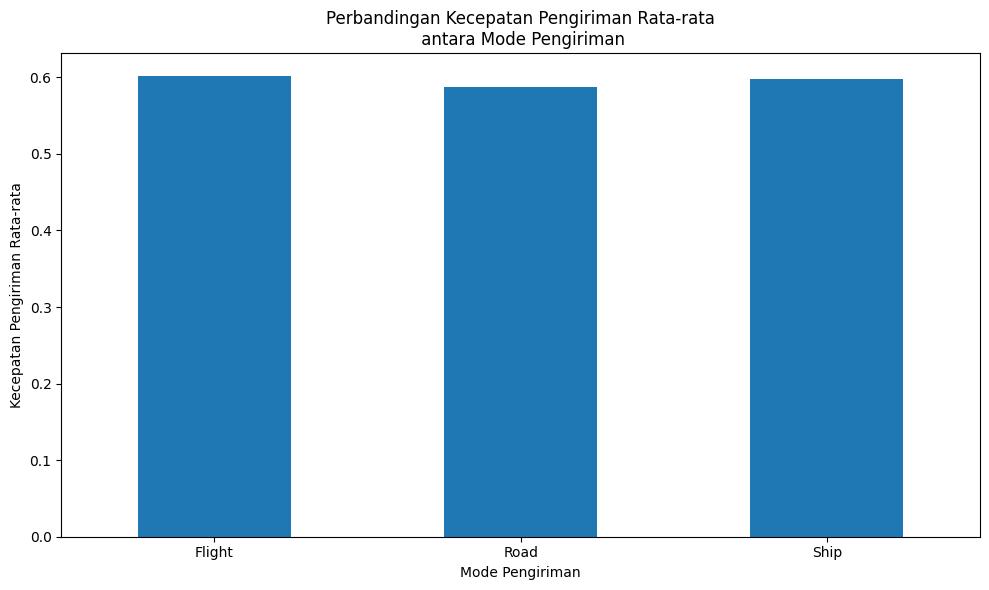

In [ ]:
# Mencari waktu pengiriman untuk setiap mode pengiriman
mean_delivery_time = df.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].mean()

# Menampilkan waktu pengiriman
print(mean_delivery_time)

# Membuat plot bar
plt.figure(figsize=(10, 6))
mean_delivery_time.plot(kind='bar')
plt.xlabel('Mode Pengiriman')
plt.ylabel('Kecepatan Pengiriman Rata-rata')
plt.title('Perbandingan Kecepatan Pengiriman Rata-rata\n antara Mode Pengiriman')
plt.xticks(rotation=0)
plt.tight_layout()

# Menampilkan plot
plt.show()

Dapat dilihat bahwa pesawatlah yang sering on time. Namun Customer lebih memilih pengiriman kapal.

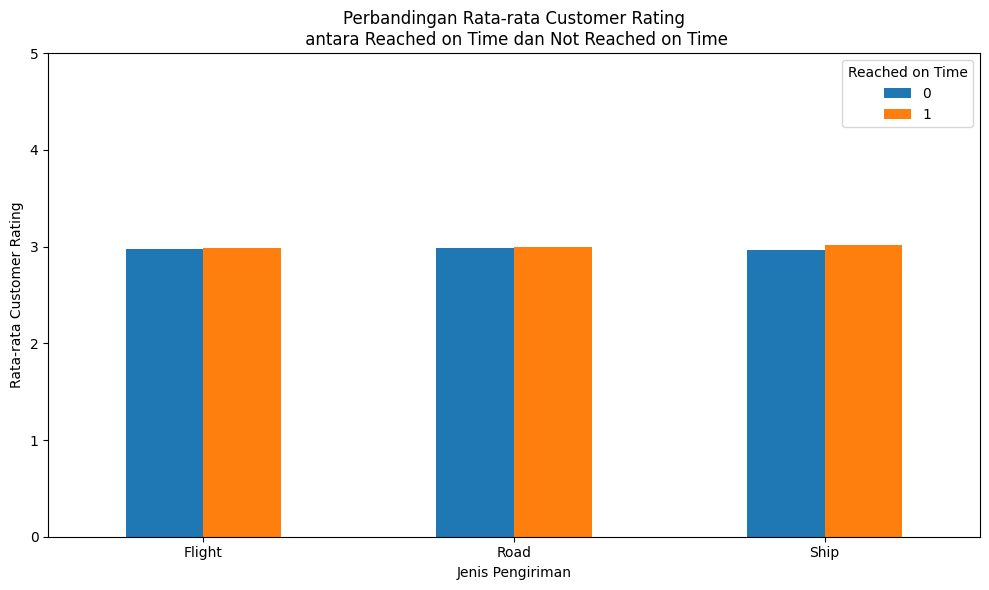

In [ ]:
#Apakah Ketepatan waktu penguiriman dapat memepengaruhi rating cusomer, lalu bandingkan dengan setiap tipe shipment
filtered_data = df[df['Mode_of_Shipment'].isin(['Flight', 'Road', 'Ship'])]

# Menghitung rata-rata Customer_rating berdasarkan Reached.on.Time_Y.N dan Mode_of_Shipment
rating_by_reached_shipment = filtered_data.groupby(['Reached.on.Time_Y.N', 'Mode_of_Shipment'])['Customer_rating'].mean().reset_index()

# Membuat pivot table untuk memformat data dengan kolom Reached.on.Time_Y.N dan baris Mode_of_Shipment
pivot_table = rating_by_reached_shipment.pivot(index='Mode_of_Shipment', columns='Reached.on.Time_Y.N', values='Customer_rating')

# Membuat plot bar
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Jenis Pengiriman')
plt.ylabel('Rata-rata Customer Rating')
plt.title('Perbandingan Rata-rata Customer Rating\n antara Reached on Time dan Not Reached on Time')
plt.xticks(rotation=0)
plt.ylim(0, 5)  # Mengatur rentang sumbu y antara 0 dan 5
plt.legend(title='Reached on Time')
plt.tight_layout()

# Menampilkan plot
plt.show()

In [ ]:
# Membuktikan bahwa pengriiman sangat berpengaruh pada rating costumer
# Membuat contingency table
contingency_table = pd.crosstab(df['Reached.on.Time_Y.N'], df['Customer_rating'])

# Melakukan uji chi-square
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Menampilkan p-value
print("P-value:", p_value)

P-value: 0.5249236018493662


Ternyata Ketepatan waktu dalam pengiriman sangat berpengaruh terhadap feed back dari customer. Dalam pembagian setiap jenid pengiriman terdapat jenis pengiriman yang lebih banyak dipilih, yaitu pengriman menggunakan kapal.

#Kesimpulan

**Berikut Beberapa kesimpulan yang dapat diperoleh dari hasil analsis data diatas :**

* Kota F merupakan pembeli terbanyak. Jumlahnya mencapai 3666
* Kota-kota yang lain lebih suka menggunakan shipment Ship dibandingkan dengan Flight dan Road
* Semua kota banyak memensan pesanan yang bersifat low
* Perbandingan rating setiap costumer tidak terlalu berbeda
* Female Lebih suka berbelanja dari pada male, denngan angka mencapai 50.2%
* Untuk pengiriman, Ship lebih banyak dipilih oleh customer
* Kecepatan pengiriman dapat mempengaruhi Rating Customer.

Ekspetasi customer :
- Customer sangat bergantung dalam ketepatan waktu pengiriman dimana semakin cepat maka rating customer akan semakin baik

* Barang yang dikirim lebih banyak yang low priority



#Rekomendasi
* Pesawat lebih ontime dalam ketepatan pengiriman namun harganya dapat diturunkan guna menarik konsumen dalm menggunakannya

* Meningkatkan ketepatan pengiriman semua jalur

* Membuat Diskon yang lebih banyak guna menarik konsumen dalam berbelanja

* Membuat Innovasi baru agar konsumen dapat lebih ditingkatkan